# Variational Univariate Gaussian

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.special import gamma as gam_fun

---
##### Summary
* Goal: Infer posterior of univariate Gaussian mean and precision for a dataset, given a normal-gamma prior.
* Methods:
    1. Evaluate closed form posterior on mean and precision (also Normal-Gamma).
    2. Use mean-field approximation to factorise approximate posterior over mean and precision.
* Details:
    1. Bishop, PRML, Chapter 10.
    2. Murphy, [Conjugate Bayesian analysis of the Gaussian distribution](https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf).


---

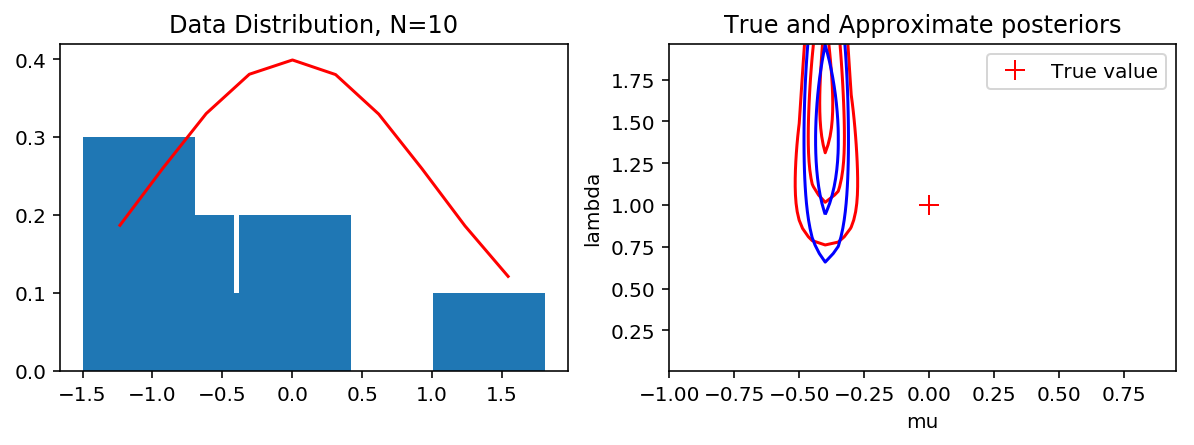

In [2]:
N = 10
mu_0 = a_0 = b_0 = k_0 = 0
data_dist = norm()
data = data_dist.rvs(N) # standard normal
data_min, data_max = np.min(data), np.max(data)
mu_ml = (1/N) * np.sum(data)
va_ml = (1/N) * np.sum(np.square((data-mu_ml)))

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title('Data Distribution, N={}'.format(N))
y_bin, x_bin = np.histogram(data, bins=10)
interval = x_bin[1]-x_bin[0]
y_bin = y_bin / N
x_bin = (x_bin[1:]+x_bin[:-1])/2
x = np.linspace(data_min, data_max, N, endpoint=True)
y = data_dist.pdf(x)
plt.bar(x_bin, y_bin)
plt.plot(x,y, 'r')

def gamma(lam, a, b):
    """The gamma distribution evaluated at lam with parameters a, b"""
    return (1/gam_fun(a))*(b**a)*(lam**(a-1))*np.exp(-b*lam)

def normal_gamma(mu, lam, m, k, a, b):
    """Evaluates probability of normal-gamma NG(mu,lam|m,k,a,b)"""
    return norm(m, 1/(k*lam)).pdf(mu)*gamma(lam, a, b)

def normal_gamma_uncoupled(mu, lam, m, k, a, b):
    """Evaluates probability of factorised posterior distributions: N(mu|m,k**-1)*Ga(lam|a,b)"""
    return norm(m, 1/k).pdf(mu)*gamma(lam, a, b)


g1, g2 = np.meshgrid(np.arange(-1,1, 0.05), np.arange(0.01,2, 0.05))
g = np.c_[g1.ravel(), g2.ravel()]
# true posterior
mu_n = (k_0*mu_0 + N*mu_ml)/(k_0+N)
k_n = k_0 + N
a_n = a_0 + N/2
b_n = b_0 + 0.5*N*va_ml + (k_0*N*(mu_ml -mu_0)**2)/(2*(k_0+N))
g = normal_gamma(g[:,0], g[:,1], mu_n, k_n, a_n, b_n).reshape(*g1.shape)

plt.subplot(122)
plt.title('True and Approximate posteriors')
l1 = plt.contour(g1, g2, g, 3, colors='r')
plt.plot(0,1, 'r+', ms=10, label='True value')
plt.xlabel('mu')
plt.ylabel('lambda')

# approximate posterior
mu_n = (k_0*mu_0 + N*mu_ml)/(k_0+N)
k_n = k_0 + N * 1/(va_ml)
a_n = a_0 + (N+1)/2
b_n = a_n * va_ml
g1, g2 = np.meshgrid(np.arange(-1,1, 0.05), np.arange(0.01,2, 0.05))
g = np.c_[g1.ravel(), g2.ravel()]
g = normal_gamma_uncoupled(g[:,0], g[:,1], mu_n, k_n, a_n, b_n).reshape(*g1.shape)
l2 = plt.contour(g1, g2, g, 3, colors='b')
plt.legend(loc=0);